### county

In [1]:
%reset -f

In [2]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [3]:
pv_state_hpi=pd.read_csv("../input/third2/HPI_AT_BDL_5state.csv", dtype={'FIPS':np.str}).set_index("FIPS")

In [4]:
def get_state_yearly_hpi(state,year):
    return pv_state_hp.loc[state,year]

In [5]:
def read_at_county_hpi():
    df=pd.read_csv("../input/third2/HPI_AT_BDL_county.csv", dtype={'FIPS code':np.str})
    df=df[df['State'].isin({'IA','CA','NY','NC','OH'})]
    df=df[df.Year>1990]
    df=df[[u'State', u'County', u'FIPS code', u'Year' ,
       u'HPI' ]]
    df.loc[df['HPI']=='.',"HPI"]=np.nan
    df['HPI']=df['HPI'].astype(np.float32)
    return df

In [6]:
county_hpi=read_at_county_hpi()

In [7]:
county_hpi.Year.max()

2017

In [8]:
pv_county_hpi=pd.pivot_table(county_hpi, columns='Year',values='HPI', index=['FIPS code'])

In [9]:
from scipy import interpolate
def f(df):
    lst=[]
    for i in df.index:
        print i,
        f = interpolate.interp1d(df.columns, df.loc[i],kind='slinear',
                                 bounds_error=False,fill_value='extrapolate')
        lst.append(f([2018])[0])
    df.loc[:,2018]=lst
    return df
pv_county_hpi=f(pv_county_hpi)

06001 06003 06005 06007 06009 06011 06013 06015 06017 06019 06021 06023 06025 06027 06029 06031 06033 06035 06037 06039 06041 06043 06045 06047 06049 06051 06053 06055 06057 06059 06061 06063 06065 06067 06069 06071 06073 06075 06077 06079 06081 06083 06085 06087 06089 06093 06095 06097 06099 06101 06103 06107 06109 06111 06113 06115 19001 19003 19005 19007 19009 19011 19013 19015 19017 19019 19021 19023 19025 19027 19029 19031 19033 19035 19037 19039 19041 19043 19045 19047 19049 19051 19053 19055 19057 19059 19061 19063 19065 19067 19069 19071 19073 19075 19077 19079 19081 19083 19085 19087 19089 19091 19093 19095 19097 19099 19101 19103 19105 19107 19109 19111 19113 19115 19117 19119 19121 19123 19125 19127 19129 19131 19133 19135 19137 19139 19141 19143 19145 19147 19149 19151 19153 19155 19157 19159 19161 19163 19165 19167 19169 19171 19173 19175 19177 19179 19181 19183 19187 19189 19191 19193 19195 19197 36001 36003 36005 36007 36009 36011 36013 36015 36017 36019 36021 36023 3602

In [10]:
pv_county_hpi[pv_county_hpi.isnull().sum(1)>0].head(20)

Year       1991   1992        1993        1994        1995        1996  \
FIPS code                                                                
06003       NaN    NaN         NaN         NaN         NaN         NaN   
06049       NaN    NaN  100.000000   97.220001  100.339996  108.919998   
06051       NaN  100.0  108.029999  101.910004  106.680000   99.570000   
19001       NaN    NaN         NaN         NaN         NaN         NaN   
19003       NaN    NaN         NaN         NaN         NaN         NaN   
19005       NaN    NaN         NaN         NaN         NaN         NaN   
19007       NaN    NaN         NaN         NaN         NaN         NaN   
19009       NaN    NaN         NaN         NaN         NaN         NaN   
19011       NaN  100.0  106.900002  118.059998  128.000000  133.320007   
19019       NaN  100.0  104.720001  116.769997  122.099998  127.339996   
19021       NaN  100.0  107.070000  113.029999  119.989998  117.290001   
19023       NaN  100.0  102.919998  111.519997  123.279999  130.419998   
19025       NaN    NaN  100.000000  120.930000  115.120003  127.180000   
19035       NaN    NaN  100.000000  108.610001  118.629997  119.720001   
19037       NaN    NaN  100.000000  104.059998  117.860001  122.660004   
19039       NaN    NaN         NaN         NaN         NaN         NaN   
19043       NaN    NaN         NaN         NaN         NaN  100.000000   
19047       NaN  100.0  103.709999  109.370003  119.209999  123.629997   
19051       NaN    NaN         NaN         NaN         NaN         NaN   
19053       NaN    NaN         NaN         NaN         NaN         NaN   

Year             1997        1998        1999        2000     ...      \
FIPS code                                                     ...       
06003             NaN  100.000000  101.989998         NaN     ...       
06049      104.849998  110.099998  113.099998  115.959999     ...       
06051      107.510002  111.680000  126.550003  140.660004     ...       
19001             NaN  100.000000  110.580002  115.139999     ...       
19003             NaN         NaN         NaN         NaN     ...       
19005             NaN  100.000000  106.080002  116.010002     ...       
19007             NaN         NaN         NaN         NaN     ...       
19009             NaN  100.000000  102.940002  116.139999     ...       
19011      138.750000  144.309998  149.039993  158.710007     ...       
19019      137.070007  145.770004  151.229996  157.699997     ...       
19021      123.980003  131.860001  138.179993  139.589996     ...       
19023      133.139999  141.080002  154.630005  156.919998     ...       
19025      137.529999  143.449997  151.500000  153.190002     ...       
19035      130.339996  126.589996  129.970001  135.759995     ...       
19037      126.660004  133.009995  136.820007  145.089996     ...       
19039             NaN  100.000000  102.320000  105.669998     ...       
19043      100.110001  103.599998  112.190002  115.260002     ...       
19047      130.330002  138.630005  142.100006  146.940002     ...       
19051             NaN         NaN         NaN         NaN     ...       
19053             NaN         NaN         NaN         NaN     ...       

Year             2009        2010        2011        2012        2013  \
FIPS code                                                               
06003      188.929993  158.309998  145.199997  131.169998  144.220001   
06049      208.800003  212.300003  172.320007  153.949997  175.779999   
06051      246.389999  225.110001  202.429993  189.589996  198.360001   
19001      138.949997  136.289993  135.250000  134.649994  135.880005   
19003      125.290001  123.410004  113.589996  118.099998  121.860001   
19005      153.710007  153.389999  152.970001  154.210007  160.729996   
19007      125.029999  115.970001  120.879997  115.070000  125.410004   
19009      142.520004  140.979996  135.259995  135.289993  142.809998   
19011      195.110001  194.649994 

In [11]:
def interpolate(county_hpi, state_hpi,beta=500):
    if np.isnan(county_hpi).sum()==0:
        return county_hpi
    assert len(county_hpi)==len(state_hpi)
    assert np.isnan(state_hpi).sum()==0
    
    n=len(county_hpi)
    A=np.zeros(shape=[n-1,n])
    for i in range(n-1):
        A[i,i]=-1
        A[i,i+1]=1
    A=np.asmatrix(A)
    B=np.asmatrix(np.diag(~np.isnan(county_hpi)).astype(np.float))
    C= np.diag(np.isnan(np.diff(county_hpi) ).astype(np.float))
    D=C*A
    BTB=B.T*B
    DTD=D.T*D
    
    E=beta*BTB+DTD
    
    v=county_hpi.copy()
    v[np.isnan(v)]=1.0
    v=np.asmatrix(np.log(v).reshape([-1,1]))
    u=np.asmatrix(np.log(state_hpi).reshape([-1,1]))
    b=beta*BTB*v+DTD*u
    #print n,A.shape,b.shape,C.shape, D.shape, BTB.shape,DTD.shape, E.shape,b.shape
    
    r=np.linalg.pinv(E)*b
    r=np.asarray(r)[:,0]
    r=np.exp(r)
    #display(pd.DataFrame(np.array([r,county_hpi,state_hpi])))
    #display(pd.DataFrame(np.array([r,county_hpi,state_hpi])).diff(axis=1))

    return  r, np.sqrt(np.nansum((r-county_hpi)**2).sum())/np.nanmean(county_hpi)

In [12]:
a=pv_county_hpi.loc['19003'].values
b=pv_state_hpi.loc['19'].values


In [13]:
interpolate(a,b,500)

(array([ 61.18266428,  63.09423083,  66.10886528,  69.9382658 ,
         74.52602551,  77.35577074,  80.39547491,  83.7172135 ,
         86.95434176,  91.14411958,  95.2931591 ,  97.86907336,
        100.        , 105.52999878, 100.30000305, 121.72000122,
        118.11000061, 118.55000305, 125.29000092, 123.41000366,
        113.58999634, 118.09999847, 121.85661738, 122.82244647,
        124.10515825, 140.11024594, 159.34211429, 165.76509143]),
 0.0003162499987091781)

In [14]:
def fillna_county_yearly_hpi():
    new_pv_county_hpi=pv_county_hpi.copy()
    for code in pv_county_hpi[pv_county_hpi.isnull().sum(1)>0].index:
        row = pv_county_hpi.loc[code]
        state_hpi=pv_state_hpi.loc[code[:2]]
        #print row,state_hpi
        estimate,error= interpolate(row.values,state_hpi.values)
        print code, "%Error=", np.round(error,4)
        for i in np.where(np.isnan(row.values)):
            year=row.index[i]
            assert np.isnan(pv_county_hpi.loc[code,year]).all()
            new_pv_county_hpi.loc[code,year]=estimate[i]
    return new_pv_county_hpi
new_pv_county_hpi=fillna_county_yearly_hpi()

06003 %Error= 0.0
06049 %Error= 0.0
06051 %Error= 0.0
19001 %Error= 0.0
19003 %Error= 0.0003
19005 %Error= 0.0
19007 %Error= 0.0
19009 %Error= 0.0
19011 %Error= 0.0
19019 %Error= 0.0
19021 %Error= 0.0
19023 %Error= 0.0
19025 %Error= 0.0
19035 %Error= 0.0
19037 %Error= 0.0
19039 %Error= 0.0
19043 %Error= 0.0
19047 %Error= 0.0
19051 %Error= 0.0
19053 %Error= 0.0
19055 %Error= 0.0
19059 %Error= 0.0
19063 %Error= 0.0
19065 %Error= 0.0
19069 %Error= 0.0
19071 %Error= 0.0
19073 %Error= 0.0
19075 %Error= 0.0
19077 %Error= 0.0
19079 %Error= 0.0
19081 %Error= 0.0
19085 %Error= 0.0
19089 %Error= 0.0
19091 %Error= 0.0
19093 %Error= 0.0
19095 %Error= 0.0
19097 %Error= 0.0
19105 %Error= 0.0
19107 %Error= 0.0
19109 %Error= 0.0
19115 %Error= 0.0
19117 %Error= 0.0
19119 %Error= 0.0
19131 %Error= 0.0
19133 %Error= 0.0
19135 %Error= 0.0
19141 %Error= 0.0
19143 %Error= 0.0
19145 %Error= 0.0
19147 %Error= 0.0
19151 %Error= 0.0
19159 %Error= 0.0002
19161 %Error= 0.0
19165 %Error= 0.0
19171 %Error= 0.0
1917

In [15]:
(new_pv_county_hpi-pv_county_hpi)[pv_county_hpi.isnull().sum(1)>0]

Year       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...   \
FIPS code                                                              ...    
06003       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   NaN  ...    
06049       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
06051       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19001       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19003       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
19005       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19007       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
19009       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19011       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19019       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19021       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19023       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19025       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19035       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19037       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19039       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19043       NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...    
19047       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19051       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
19053       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
19055       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19059       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19063       NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19065       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19069       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19071       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19073       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
19075       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
19077       NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...    
19079       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    
37099       NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...    
37103       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37111       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37113       NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37115       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
37117       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37121       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0  ...    
37123       NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...    
37131       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37137       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37143       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
37145       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37149       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37163       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37173       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0  ...    
37185       NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37187       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
37189       NaN   NaN   0.0   0.0   0.0   0.0   0.

In [16]:
(new_pv_county_hpi)[pv_county_hpi.isnull().sum(1)>0]

Year             1991        1992        1993        1994        1995  \
FIPS code                                                               
06003      102.503998  100.750763   95.534836   92.617157   90.207283   
06049      107.294891  105.459709  100.000000   97.220001  100.339996   
06051      101.740166  100.000000  108.029999  101.910004  106.680000   
19001       73.082535   75.365898   78.966873   83.541084   89.021149   
19003       61.182663   63.094231   66.108864   69.938263   74.526024   
19005       73.082535   75.365898   78.966873   83.541084   89.021149   
19007       64.204674   66.210663   69.374199   73.392746   78.207108   
19009       73.082535   75.365898   78.966873   83.541084   89.021149   
19011       96.970299  100.000000  106.900002  118.059998  128.000000   
19019       96.970299  100.000000  104.720001  116.769997  122.099998   
19021       96.970299  100.000000  107.070000  113.029999  119.989998   
19023       96.970299  100.000000  102.919998  111.519997  123.279999   
19025       92.548347   95.439896  100.000000  120.930000  115.120003   
19035       92.548347   95.439896  100.000000  108.610001  118.629997   
19037       92.548347   95.439896  100.000000  104.059998  117.860001   
19039       73.082535   75.365898   78.966873   83.541084   89.021149   
19043       79.092567   81.563705   85.460808   90.411179   96.341911   
19047       96.970299  100.000000  103.709999  109.370003  119.209999   
19051       64.204674   66.210663   69.374199   73.392746   78.207108   
19053       62.514809   64.467995   67.548271   71.461052   76.148697   
19055       96.970299  100.000000  106.500000  113.440002  116.680000   
19059       96.970299  100.000000  111.489998  124.889999  129.149994   
19063       82.095703   84.660667   88.705742   93.844086  100.000000   
19065       92.548347   95.439896  100.000000  105.540001  114.839996   
19069       73.082535   75.365898   78.966873   83.541084   89.021149   
19071       73.082535   75.365898   78.966873   83.541084   89.021149   
19073       73.082535   75.365898   78.966873   83.541084   89.021149   
19075       96.970299  100.000000  100.470001  108.480003  109.959999   
19077       79.092567   81.563705   85.460808   90.411179   96.341911   
19079       96.970299  100.000000  104.169998  106.160004  116.919998   
...               ...         ...         ...         ...         ...   
37099       84.869835   86.278786   87.666283   91.042053   96.148621   
37103       98.366974  100.000000   99.779999   98.089996  108.120003   
37111       98.366974  100.000000   98.349998  102.669998  111.019997   
37113       88.269424   89.734818   91.177895   94.688881  100.000000   
37115       78.280228   79.579788   80.859558   83.973221   88.683289   
37117       96.810120   98.417297  100.000000  104.910004  113.639999   
37121       75.616516   76.871857   78.108070   81.115784   85.665581   
37123       84.869835   86.278786   87.666283   91.042053   96.148621   
37131       96.810120   98.417297  100.000000  109.790001  115.180000   
37137       98.366974  100.000000   95.150002   99.430000  115.150002   
37143       78.280228   79.579788   80.859558   83.973221   88.683289   
37145       98.366974  100.000000   97.900002  104.260002  108.480003   
37149       98.366974  100.000000  104.290001  103.879997  107.480003   
37163       98.366974  100.000000  101.720001  108.980003  110.849998   
37173       78.280228   79.579788   80.859558   83.973221   88.683289   
37185       98.366974  100.000000   98.779999   98.959999  110.699997   
37187       96.810120   98.417297  100.000000   93.480003  104.839996   
37189       96.810120   98.417297  100.000000  103.879997  109.209999   
37197       96.810120   98.417297  100.000000  101.949997  111.410004   
37199       78.280228   79.579788   80.859558   83.973221   88.683289   
39001       94.103142   96.999329  100.000000  108.949997  113.980003   
39053       97.014221  100.000000   96.320000   99.570000 

In [17]:
pv_county_hpi=new_pv_county_hpi

In [18]:
pv_county_hpi.to_csv("../input/third2/HPI_AT_BDL_county_5state.csv")

### tract

In [19]:
%reset -f

In [20]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [21]:
pv_county_hpi=pd.read_csv("../input/third2/HPI_AT_BDL_county_5state.csv", dtype={'FIPS code':np.str}).set_index("FIPS code")

In [22]:
def get_county_yearly_hpi(county,year):
    return pv_county_hpi.loc[county,year]

In [23]:
def read_at_tract_hpi():
    df=pd.read_csv("../input/third2/HPI_AT_BDL_tract.csv", dtype={'tract':np.str})
    df=df[df['state_abbr'].isin({'IA','CA','NY','NC','OH'})]
    df=df[df.year>1990]
    df=df[[u'tract', u'state_abbr',  u'year' ,
       u'hpi' ]]
    df.loc[df['hpi']=='.',"hpi"]=np.nan
    df['hpi']=df['hpi'].astype(np.float32)
    return df

In [24]:
tract_hpi=read_at_tract_hpi()

In [25]:
tract_hpi.year.max(),tract_hpi.year.min()

(2017, 1991)

In [26]:
pv_tract_hpi=pd.pivot_table(tract_hpi, columns='year',values='hpi', index=['tract'])

In [27]:
from scipy import interpolate
def f(df):
    lst=[]
    for i in df.index:
        print i,
        f = interpolate.interp1d(df.columns, df.loc[i],kind='slinear',
                                 bounds_error=False,fill_value='extrapolate')
        lst.append(f([2018])[0])
    df.loc[:,2018]=lst
    return df
pv_tract_hpi=f(pv_tract_hpi)

06001400100 06001400200 06001400300 06001400400 06001400500 06001400600 06001400700 06001400800 06001400900 06001401000 06001401100 06001401200 06001401400 06001401500 06001403501 06001403600 06001403800 06001403900 06001404000 06001404101 06001404102 06001404200 06001404300 06001404400 06001404501 06001404502 06001404600 06001404700 06001404800 06001404900 06001405000 06001405100 06001405200 06001405301 06001405401 06001405500 06001405600 06001405700 06001405800 06001405901 06001405902 06001406100 06001406201 06001406202 06001406300 06001406400 06001406500 06001406601 06001406602 06001406700 06001406800 06001406900 06001407000 06001407101 06001407102 06001407200 06001407300 06001407400 06001407500 06001407600 06001407700 06001407800 06001407900 06001408000 06001408100 06001408200 06001408300 06001408400 06001408500 06001408600 06001408700 06001408800 06001408900 06001409000 06001409100 06001409200 06001409300 06001409400 06001409500 06001409600 06001409700 06001409800 06001409900 0600

06029000700 06029000800 06029000902 06029000903 06029000904 06029000905 06029000906 06029000907 06029000908 06029000909 06029000910 06029001000 06029001101 06029001102 06029001400 06029001700 06029001801 06029001802 06029001901 06029001902 06029002301 06029002400 06029002500 06029002600 06029002700 06029002804 06029002806 06029002807 06029002808 06029002811 06029002812 06029002813 06029002814 06029002815 06029002816 06029002817 06029002818 06029002819 06029002820 06029002821 06029002900 06029003000 06029003103 06029003112 06029003113 06029003114 06029003115 06029003121 06029003122 06029003123 06029003124 06029003202 06029003203 06029003204 06029003205 06029003206 06029003305 06029003306 06029003400 06029003500 06029003600 06029003803 06029003804 06029003805 06029003806 06029003807 06029003808 06029003809 06029003810 06029003811 06029003812 06029003813 06029004000 06029004101 06029004301 06029004401 06029004604 06029004701 06029004800 06029004901 06029004902 06029005004 06029005103 0602

 06037311300 06037311400 06037311500 06037311600 06037311700 06037311801 06037311802 06037320100 06037320201 06037320202 06037320300 06037400204 06037400205 06037400206 06037400207 06037400302 06037400304 06037400402 06037400403 06037400404 06037400501 06037400602 06037400603 06037400604 06037400800 06037400900 06037401001 06037401002 06037401101 06037401102 06037401201 06037401202 06037401203 06037401303 06037401304 06037401311 06037401312 06037401500 06037401601 06037401602 06037401603 06037401701 06037401703 06037401704 06037401800 06037401902 06037402001 06037402002 06037402101 06037402102 06037402200 06037402301 06037402303 06037402304 06037402402 06037402403 06037402405 06037402406 06037402502 06037402600 06037402702 06037402703 06037402705 06037402706 06037402801 06037402803 06037402804 06037402902 06037402903 06037402904 06037403000 06037403303 06037403304 06037403305 06037403312 06037403316 06037403317 06037403318 06037403319 06037403320 06037403321 06037403322 06037403323 060

 06037620305 06037620400 06037620501 06037620521 06037620522 06037620601 06037620602 06037620701 06037620702 06037620800 06037620901 06037620904 06037621001 06037621004 06037621102 06037621104 06037621201 06037621301 06037621324 06037621326 06037621400 06037650001 06037650003 06037650004 06037650101 06037650102 06037650200 06037650300 06037650401 06037650501 06037650502 06037650602 06037650603 06037650605 06037650701 06037650702 06037650800 06037650901 06037650902 06037651001 06037651002 06037651101 06037651102 06037651201 06037651221 06037651222 06037651302 06037651304 06037651401 06037651402 06037670001 06037670002 06037670003 06037670100 06037670201 06037670202 06037670324 06037670326 06037670328 06037670403 06037670405 06037670407 06037670411 06037670413 06037670416 06037670602 06037670701 06037670702 06037700101 06037700400 06037700501 06037700901 06037700902 06037701201 06037701304 06037701601 06037701801 06037702102 06037702201 06037702202 06037702300 06037702400 06037702501 060

 06059087106 06059087200 06059087300 06059087401 06059087403 06059087404 06059087405 06059087503 06059087504 06059087505 06059087601 06059087602 06059087701 06059087703 06059087704 06059087801 06059087802 06059087803 06059087805 06059087806 06059087901 06059087902 06059088001 06059088002 06059088104 06059088105 06059088106 06059088107 06059088201 06059088202 06059088203 06059088301 06059088302 06059088401 06059088402 06059088403 06059088501 06059088502 06059088601 06059088602 06059088701 06059088702 06059088801 06059088802 06059088901 06059088902 06059088903 06059088904 06059088905 06059089001 06059089003 06059089004 06059089102 06059089104 06059089105 06059089106 06059089107 06059099202 06059099203 06059099204 06059099212 06059099214 06059099215 06059099216 06059099217 06059099220 06059099222 06059099223 06059099224 06059099225 06059099226 06059099227 06059099229 06059099230 06059099231 06059099232 06059099233 06059099234 06059099235 06059099237 06059099238 06059099239 06059099240 060

 06067008508 06067008509 06067008510 06067008512 06067008513 06067008600 06067008702 06067008703 06067008705 06067008801 06067008905 06067008907 06067008908 06067008909 06067008910 06067008911 06067008912 06067008913 06067009004 06067009005 06067009006 06067009007 06067009008 06067009010 06067009011 06067009103 06067009105 06067009106 06067009107 06067009108 06067009109 06067009111 06067009112 06067009201 06067009307 06067009308 06067009309 06067009310 06067009311 06067009312 06067009314 06067009316 06067009317 06067009318 06067009319 06067009320 06067009321 06067009322 06067009323 06067009324 06067009325 06067009326 06067009328 06067009329 06067009330 06067009331 06067009332 06067009403 06067009404 06067009406 06067009407 06067009408 06067009501 06067009502 06067009503 06067009504 06067009601 06067009606 06067009608 06067009609 06067009610 06067009611 06067009612 06067009614 06067009615 06067009616 06067009617 06067009618 06067009619 06067009622 06067009630 06067009632 06067009633 060

06073018601 06073018603 06073018608 06073018609 06073018610 06073018611 06073018612 06073018613 06073018614 06073018801 06073018802 06073018803 06073018903 06073018904 06073018905 06073018906 06073019001 06073019002 06073019101 06073019103 06073019105 06073019106 06073019107 06073019203 06073019205 06073019206 06073019207 06073019208 06073019301 06073019302 06073019303 06073019403 06073019404 06073019405 06073019406 06073019501 06073019502 06073019503 06073019601 06073019602 06073019701 06073019702 06073019803 06073019804 06073019805 06073019806 06073019808 06073019809 06073019902 06073019903 06073019904 06073019905 06073020013 06073020014 06073020015 06073020016 06073020017 06073020018 06073020019 06073020020 06073020021 06073020022 06073020023 06073020024 06073020025 06073020026 06073020027 06073020103 06073020105 06073020106 06073020107 06073020108 06073020109 06073020202 06073020206 06073020207 06073020208 06073020209 06073020210 06073020211 06073020304 06073020305 06073020306 0607

 06085508101 06085508102 06085508202 06085508203 06085508204 06085508301 06085508303 06085508304 06085508401 06085508403 06085508404 06085508503 06085508504 06085508505 06085508508 06085508601 06085508602 06085508703 06085508704 06085508800 06085508900 06085509000 06085509102 06085509105 06085509106 06085509108 06085509201 06085509202 06085509302 06085509401 06085509404 06085509500 06085509600 06085509700 06085509801 06085509802 06085509901 06085509902 06085510001 06085510002 06085510100 06085510200 06085510300 06085510400 06085510500 06085510600 06085510700 06085510801 06085510802 06085510803 06085510900 06085511000 06085511100 06085511200 06085511301 06085511302 06085511400 06085511500 06085511701 06085511702 06085511704 06085511705 06085511707 06085511800 06085511905 06085511907 06085511909 06085511910 06085511911 06085511912 06085511913 06085511914 06085511915 06085511916 06085512001 06085512005 06085512017 06085512019 06085512020 06085512021 06085512022 06085512023 06085512024 060

 19013002301 19013002304 19013002400 19013002500 19013002601 19013002603 19013002604 19013002700 19013002800 19013002901 19013002902 19013003001 19013003002 19015020100 19015020200 19015020300 19015020400 19015020500 19015020600 19015020700 19017004000 19017004100 19017004200 19017004300 19017004400 19017004500 19017004600 19017004700 19019950100 19019950200 19019950300 19019950400 19019950500 19019950600 19021960300 19021960400 19021960500 19021960600 19023070100 19023070300 19023070400 19023070500 19025950100 19025950200 19025950400 19027960100 19027960200 19027960300 19027960400 19027960500 19027960600 19029190100 19029190200 19029190400 19029190500 19031450100 19031450200 19031450300 19031450400 19031450500 19033950102 19033950200 19033950300 19033950402 19033950600 19033950700 19033950800 19033950900 19033951000 19033951400 19033951600 19035080100 19035080200 19035080400 19037070100 19037070200 19037070300 19037070400 19039960100 19039960200 19039960300 19041080100 19041080200 190

 36019100600 36019100700 36019100800 36019100900 36019101000 36019101700 36019101800 36019101900 36019102000 36019102100 36019102200 36021000200 36021000300 36021000401 36021000402 36021000500 36021000700 36021000900 36021001000 36021001100 36021001300 36021001400 36021001500 36021001600 36021001700 36021001800 36021001900 36021002000 36023970200 36023970300 36023970500 36023970700 36023971000 36023971200 36025970400 36025970600 36027010000 36027020003 36027020004 36027020005 36027030000 36027040001 36027040003 36027050102 36027050103 36027050104 36027050203 36027050204 36027050205 36027060100 36027060201 36027060202 36027060301 36027060400 36027070101 36027070102 36027070201 36027070301 36027070401 36027080103 36027080104 36027080201 36027080202 36027090000 36027100000 36027110003 36027110004 36027110005 36027120000 36027130003 36027130004 36027130005 36027140101 36027140200 36027140300 36027140400 36027140500 36027140602 36027140700 36027140801 36027150003 36027150004 36027150005 360

 36063022602 36063022702 36063022711 36063022712 36063022803 36063022804 36063022902 36063023200 36063023300 36063023401 36063023402 36063023404 36063023600 36063023800 36063023901 36063023902 36063024001 36063024101 36063024102 36063024201 36063024202 36063024302 36063024303 36063024401 36063024404 36063024405 36063024406 36063024501 36063024502 36063024600 36065021303 36065021601 36065021602 36065021701 36065021702 36065022200 36065022400 36065022701 36065022702 36065022800 36065023000 36065023200 36065023400 36065023501 36065023502 36065023702 36065023901 36065023902 36065024000 36065024200 36065024301 36065024500 36065024700 36065024800 36065024900 36065025001 36065025002 36065025003 36065025100 36065025200 36065025300 36065025400 36065025500 36065026100 36065026200 36065026700 36067000400 36067000900 36067001702 36067001800 36067001900 36067004400 36067004500 36067004600 36067004800 36067005000 36067005601 36067006103 36067010100 36067010200 36067010301 36067010321 36067010322 360

36103110803 36103110901 36103110902 36103111001 36103111002 36103111100 36103111201 36103111202 36103111300 36103111401 36103111402 36103111503 36103111504 36103111505 36103111506 36103111601 36103111602 36103111701 36103111703 36103111704 36103111801 36103111802 36103111803 36103111804 36103111900 36103112001 36103112002 36103112102 36103112103 36103112104 36103112204 36103112206 36103112210 36103112211 36103112212 36103112213 36103112214 36103122300 36103122403 36103122404 36103122405 36103122406 36103122501 36103122502 36103122601 36103122602 36103122603 36103122704 36103122705 36103122706 36103122707 36103122801 36103122802 36103122901 36103122902 36103123001 36103123002 36103123101 36103123102 36103123201 36103123202 36103123301 36103123401 36103123402 36103123500 36103123600 36103123701 36103123702 36103123801 36103123802 36103123900 36103124001 36103124002 36103124101 36103124102 36103124200 36103124300 36103124401 36103124402 36103124500 36103124601 36103124602 36103134702 3610

 37031970704 37031970801 37031970802 37031970803 37031970804 37031970805 37031970901 37031970902 37031970903 37031971002 37031971101 37031971102 37033930200 37033930300 37033930400 37033930500 37033930600 37035010101 37035010102 37035010201 37035010202 37035010301 37035010302 37035010303 37035010304 37035010401 37035010402 37035010501 37035010502 37035010600 37035010700 37035010900 37035011101 37035011102 37035011200 37035011300 37035011401 37035011402 37035011501 37035011503 37035011504 37035011601 37035011602 37035011701 37035011702 37035011801 37035011802 37037020103 37037020104 37037020105 37037020106 37037020200 37037020300 37037020401 37037020402 37037020500 37037020600 37037020701 37037020702 37037020800 37039930100 37039930200 37039930300 37039930400 37039930500 37039930601 37039930602 37041930101 37041930102 37041930200 37043950100 37043950200 37045950101 37045950102 37045950200 37045950301 37045950302 37045950400 37045950500 37045950601 37045950602 37045950700 37045950800 370

37119005519 37119005520 37119005521 37119005522 37119005524 37119005605 37119005610 37119005611 37119005612 37119005614 37119005615 37119005617 37119005618 37119005619 37119005620 37119005621 37119005706 37119005709 37119005710 37119005711 37119005712 37119005713 37119005714 37119005715 37119005716 37119005717 37119005811 37119005812 37119005815 37119005816 37119005817 37119005823 37119005825 37119005826 37119005828 37119005830 37119005831 37119005832 37119005833 37119005834 37119005835 37119005836 37119005837 37119005838 37119005839 37119005840 37119005841 37119005842 37119005843 37119005844 37119005845 37119005846 37119005847 37119005848 37119005906 37119005907 37119005908 37119005909 37119005911 37119005912 37119005913 37119005914 37119005917 37119005918 37119006005 37119006006 37119006007 37119006008 37119006009 37119006010 37119006103 37119006104 37119006105 37119006106 37119006107 37119006108 37119006109 37119006203 37119006204 37119006208 37119006209 37119006210 37119006211 3711

39017000100 39017000200 39017000400 39017000500 39017000600 39017001001 39017001002 39017001100 39017001300 39017010101 39017010102 39017010103 39017010202 39017010203 39017010301 39017010302 39017010500 39017010600 39017010800 39017010901 39017010903 39017010904 39017010906 39017010907 39017010908 39017010909 39017010910 39017010911 39017011002 39017011003 39017011004 39017011109 39017011110 39017011111 39017011112 39017011116 39017011117 39017011118 39017011120 39017011121 39017011123 39017011125 39017011126 39017011127 39017011128 39017011129 39017011130 39017011131 39017011200 39017011300 39017011800 39017012100 39017012200 39017012300 39017012400 39017012500 39017012600 39017012700 39017013200 39017013300 39017013400 39017013500 39017013600 39017013900 39017014100 39017014300 39017014700 39017014800 39017014900 39017015000 39017015100 39019720100 39019720200 39019720300 39019720400 39019720500 39019720600 39019720700 39021010100 39021010200 39021010400 39021010500 39021010600 3902

39055312100 39055312201 39055312202 39055312203 39055312300 39055312400 39057200101 39057200103 39057200104 39057200300 39057200400 39057200500 39057200600 39057200700 39057200900 39057210100 39057210200 39057210300 39057210401 39057210402 39057210500 39057210601 39057210602 39057210603 39057220100 39057220200 39057230100 39057240100 39057240200 39057240301 39057240302 39057240500 39057240600 39057240700 39057255000 39057260100 39057270100 39057280101 39057280102 39057280200 39059977100 39059977200 39059977300 39059977400 39059977500 39059977600 39059977700 39059977800 39059977900 39059978000 39061001800 39061001900 39061002500 39061002600 39061002700 39061002900 39061004000 39061004100 39061004200 39061004500 39061004602 39061004603 39061004604 39061004605 39061004701 39061004800 39061004900 39061005000 39061005100 39061005200 39061005301 39061005302 39061005400 39061005500 39061005600 39061005701 39061005702 39061005800 39061005900 39061006000 39061006100 39061006300 39061006400 3906

39117965000 39117965100 39117965200 39117965300 39117965400 39117965500 39119911000 39119911100 39119911200 39119911300 39119911400 39119911500 39119911600 39119911700 39119911800 39119912000 39119912200 39119912300 39119912400 39119912500 39119912600 39119912700 39119912800 39121968300 39121968400 39123050100 39123050201 39123050202 39123050301 39123050302 39123050500 39123050600 39123050700 39123050800 39123050900 39123051000 39123051100 39123051200 39125960100 39125960200 39125960300 39125960400 39125960500 39127965800 39127965900 39127966000 39127966100 39127966200 39127966300 39129020200 39129020310 39129020320 39129020400 39129021100 39129021200 39129021401 39129021402 39129021500 39129021600 39129021700 39131952200 39131952300 39131952400 39131952500 39131952600 39133600102 39133600103 39133600200 39133600301 39133600302 39133600401 39133600402 39133600403 39133600500 39133600602 39133600603 39133600703 39133600704 39133600705 39133600706 39133600800 39133600901 39133600902 3913

In [28]:
pv_tract_hpi.head()

year               1991        1992        1993        1994        1995  \
tract                                                                     
06001400100  156.289993  168.080002  180.100006  179.979996  209.029999   
06001400200  172.649994  175.520004  178.830002  182.750000  175.160004   
06001400300  318.910004  324.329987  318.600006  312.160004  309.540009   
06001400400  302.619995  303.049988  298.760010  291.149994  293.899994   
06001400500  164.559998  164.940002  165.429993  157.889999  141.529999   

year               1996        1997        1998        1999        2000  \
tract                                                                     
06001400100  162.190002  195.929993  212.830002  260.190002  318.070007   
06001400200  178.190002  178.679993  210.130005  230.750000  311.630005   
06001400300  318.200012  340.140015  368.369995  418.760010  539.640015   
06001400400  305.920013  329.480011  360.339996  404.049988  461.609985   
06001400500  162.270004  155.419998  190.350006  209.880005  272.600006   

year            ...             2009        2010        2011        2012  \
tract           ...                                                        
06001400100     ...       416.450012  427.679993  426.929993  432.589996   
06001400200     ...       464.660004  471.000000  464.130005  475.679993   
06001400300     ...       891.349976  882.609985  863.570007  882.760010   
06001400400     ...       835.460022  844.280029  860.880005  875.119995   
06001400500     ...       435.480011  434.709991  419.070007  413.079987   

year               2013         2014         2015         2016         2017  \
tract                                                                         
06001400100  451.540009   505.390015   588.020020   599.000000          NaN   
06001400200  508.799988   613.440002   614.690002   672.390015          NaN   
06001400300  954.570007  1063.229980  1208.000000  1270.689941  1408.880005   
06001400400  949.590027  1152.969971  1261.489990  1411.290039  1423.540039   
06001400500  495.440002   558.989990   594.150024   723.549988   815.530029   

year                2018  
tract                     
06001400100          NaN  
06001400200          NaN  
06001400300  1547.070068  
06001400400  1435.790039  
06001400500   907.510071  

[5 rows x 28 columns]

In [29]:
pv_tract_hpi[pv_tract_hpi.isnull().sum(1)>25]

Empty DataFrame
Columns: [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 28 columns]

In [30]:
pv_tract_hpi[pv_tract_hpi.isnull().sum(1)>0].isnull().sum(1).max(),len(pv_tract_hpi[pv_tract_hpi.isnull().sum(1)>0])

(25, 6197)

In [31]:
pv_tract_hpi[pv_tract_hpi.isnull().sum(1)>0].head()

year               1991        1992        1993        1994        1995  \
tract                                                                     
06001400100  156.289993  168.080002  180.100006  179.979996  209.029999   
06001400200  172.649994  175.520004  178.830002  182.750000  175.160004   
06001400800         NaN  100.000000  105.589996  106.470001  114.320000   
06001401100  173.710007  179.940002  182.429993  174.539993  157.559998   
06001401400         NaN         NaN         NaN         NaN         NaN   

year               1996        1997        1998        1999        2000  \
tract                                                                     
06001400100  162.190002  195.929993  212.830002  260.190002  318.070007   
06001400200  178.190002  178.679993  210.130005  230.750000  311.630005   
06001400800   98.940002  111.300003  145.570007  138.009995  188.490005   
06001401100  160.500000  174.300003  181.169998  220.479996  277.980011   
06001401400         NaN         NaN         NaN         NaN         NaN   

year            ...            2009        2010        2011        2012  \
tract           ...                                                       
06001400100     ...      416.450012  427.679993  426.929993  432.589996   
06001400200     ...      464.660004  471.000000  464.130005  475.679993   
06001400800     ...      297.760010  305.769989  291.850006  309.339996   
06001401100     ...      483.029999  477.160004  452.720001  456.829987   
06001401400     ...      104.190002   96.110001  118.459999  131.259995   

year               2013        2014        2015        2016        2017  \
tract                                                                     
06001400100  451.540009  505.390015  588.020020  599.000000         NaN   
06001400200  508.799988  613.440002  614.690002  672.390015         NaN   
06001400800  373.829987  442.390015  472.880005  601.429993  586.929993   
06001401100  514.130005  611.020020  667.729980  789.419983         NaN   
06001401400  141.660004  155.880005  198.600006  207.720001  249.649994   

year               2018  
tract                    
06001400100         NaN  
06001400200         NaN  
06001400800  572.429993  
06001401100         NaN  
06001401400  291.579987  

[5 rows x 28 columns]

In [32]:
def interpolate(county_hpi, state_hpi,beta=500):
    if np.isnan(county_hpi).sum()==0:
        return county_hpi
    assert len(county_hpi)==len(state_hpi)
    assert np.isnan(state_hpi).sum()==0
    
    n=len(county_hpi)
    A=np.zeros(shape=[n-1,n])
    for i in range(n-1):
        A[i,i]=-1
        A[i,i+1]=1
    A=np.asmatrix(A)
    B=np.asmatrix(np.diag(~np.isnan(county_hpi)).astype(np.float))
    C= np.diag(np.isnan(np.diff(county_hpi) ).astype(np.float))
    D=C*A
    BTB=B.T*B
    DTD=D.T*D
    
    E=beta*BTB+DTD
    
    v=county_hpi.copy()
    v[np.isnan(v)]=1.0
    v=np.asmatrix(np.log(v).reshape([-1,1]))
    u=np.asmatrix(np.log(state_hpi).reshape([-1,1]))
    b=beta*BTB*v+DTD*u
    #print n,A.shape,b.shape,C.shape, D.shape, BTB.shape,DTD.shape, E.shape,b.shape
    
    r=np.linalg.pinv(E)*b
    r=np.asarray(r)[:,0]
    r=np.exp(r)
    #display(pd.DataFrame(np.array([r,county_hpi,state_hpi])))
    #display(pd.DataFrame(np.array([r,county_hpi,state_hpi])).diff(axis=1))

    return  r, np.sqrt(np.nansum((r-county_hpi)**2).sum())/np.nanmean(county_hpi)

In [33]:
b=pv_county_hpi.loc['06001'].values
a=pv_tract_hpi.loc['06001403600'].values


In [34]:
interpolate(a,b,500)

(array([103.13252503, 102.39744835, 100.        ,  79.12782704,
         87.53499577,  98.49344256, 101.54066388, 109.63484897,
        117.62828132, 158.17457103, 194.82971726, 200.19999695,
        223.07998889, 233.26252599, 269.12245356, 296.51273034,
        290.46323739, 269.57998657, 262.82998657, 266.57998657,
        241.69000244, 280.73001099, 287.61056997, 340.17286704,
        376.66615731, 418.86993759, 453.93136792, 488.99279552]),
 0.00033899114524168583)

In [35]:
def fillna_tract_yearly_hpi():
    new_pv_tract_hpi=pv_tract_hpi.copy()
    for code in pv_tract_hpi[pv_tract_hpi.isnull().sum(1)>0].index:
        row = pv_tract_hpi.loc[code]
        state_hpi=pv_county_hpi.loc[code[:5]]
        #print row,state_hpi
        estimate,error= interpolate(row.values,state_hpi.values)
        print code, "%Error=", np.round(error,4)
        for i in np.where(np.isnan(row.values)):
            year=row.index[i]
            assert np.isnan(new_pv_tract_hpi.loc[code,year]).all()
            new_pv_tract_hpi.loc[code,year]=estimate[i]
    return new_pv_tract_hpi
new_pv_tract_hpi=fillna_tract_yearly_hpi()

06001400100 %Error= 0.0
06001400200 %Error= 0.0
06001400800 %Error= 0.0
06001401100 %Error= 0.0
06001401400 %Error= 0.0
06001401500 %Error= 0.0
06001403501 %Error= 0.0
06001403600 %Error= 0.0003
06001404000 %Error= 0.0003
06001404102 %Error= 0.0003
06001404501 %Error= 0.0001
06001405301 %Error= 0.0001
06001405401 %Error= 0.0009
06001405500 %Error= 0.0
06001405902 %Error= 0.0001
06001406100 %Error= 0.0003
06001406202 %Error= 0.0003
06001407300 %Error= 0.0004
06001407400 %Error= 0.0
06001407500 %Error= 0.0
06001408900 %Error= 0.0
06001409000 %Error= 0.0
06001409100 %Error= 0.0
06001409200 %Error= 0.0
06001409400 %Error= 0.0
06001409500 %Error= 0.0002
06001410300 %Error= 0.0
06001421400 %Error= 0.0002
06001421700 %Error= 0.0
06001422000 %Error= 0.0001
06001422500 %Error= 0.0001
06001422700 %Error= 0.0002
06001423200 %Error= 0.0
06001423500 %Error= 0.0
06001423601 %Error= 0.0
06001423602 %Error= 0.0003
06001423700 %Error= 0.0004
06001423800 %Error= 0.0
06001423901 %Error= 0.0
06001423902 %

06037185310 %Error= 0.0
06037185320 %Error= 0.0
06037186403 %Error= 0.0
06037186404 %Error= 0.0001
06037188201 %Error= 0.0002
06037188202 %Error= 0.0
06037189101 %Error= 0.0001
06037189202 %Error= 0.0003
06037189500 %Error= 0.0001
06037189702 %Error= 0.0001
06037189800 %Error= 0.0001
06037190802 %Error= 0.0004
06037191500 %Error= 0.0
06037191902 %Error= 0.0
06037192001 %Error= 0.0001
06037192300 %Error= 0.0005
06037192510 %Error= 0.0003
06037194101 %Error= 0.0004
06037194102 %Error= 0.0001
06037194401 %Error= 0.0002
06037194402 %Error= 0.0001
06037194500 %Error= 0.0001
06037195201 %Error= 0.0
06037195300 %Error= 0.0
06037195710 %Error= 0.0001
06037195802 %Error= 0.0004
06037195803 %Error= 0.0
06037195901 %Error= 0.0002
06037195902 %Error= 0.0002
06037197300 %Error= 0.0
06037197420 %Error= 0.0
06037197500 %Error= 0.0
06037199110 %Error= 0.0
06037199400 %Error= 0.0001
06037199800 %Error= 0.0001
06037201200 %Error= 0.0
06037201302 %Error= 0.0
06037201503 %Error= 0.0001
06037201504 %Error=

06037600902 %Error= 0.0
06037601001 %Error= 0.0001
06037601002 %Error= 0.0001
06037601100 %Error= 0.0002
06037601212 %Error= 0.0
06037601302 %Error= 0.0002
06037601501 %Error= 0.0001
06037601502 %Error= 0.0
06037601600 %Error= 0.0001
06037601700 %Error= 0.0002
06037601801 %Error= 0.0003
06037601802 %Error= 0.0001
06037601900 %Error= 0.0001
06037602002 %Error= 0.0
06037602003 %Error= 0.0
06037602104 %Error= 0.0
06037602403 %Error= 0.0
06037602404 %Error= 0.0
06037602509 %Error= 0.0001
06037602801 %Error= 0.0004
06037603006 %Error= 0.0001
06037603301 %Error= 0.0
06037603801 %Error= 0.0
06037609900 %Error= 0.0
06037620002 %Error= 0.0
06037620301 %Error= 0.0
06037620303 %Error= 0.0005
06037620305 %Error= 0.0
06037620521 %Error= 0.0002
06037620901 %Error= 0.0007
06037620904 %Error= 0.0001
06037621004 %Error= 0.0
06037621104 %Error= 0.0004
06037621324 %Error= 0.0
06037621326 %Error= 0.0001
06037650602 %Error= 0.0003
06037650605 %Error= 0.0001
06037650800 %Error= 0.0
06037670201 %Error= 0.000

06061023900 %Error= 0.0
06063000400 %Error= 0.0
06065030103 %Error= 0.0
06065030300 %Error= 0.0
06065030400 %Error= 0.0
06065030501 %Error= 0.0
06065031300 %Error= 0.0
06065031601 %Error= 0.0
06065031602 %Error= 0.0
06065040204 %Error= 0.0003
06065040607 %Error= 0.0
06065040609 %Error= 0.0
06065040611 %Error= 0.0
06065040613 %Error= 0.0
06065040615 %Error= 0.0
06065040616 %Error= 0.0
06065041001 %Error= 0.0
06065041002 %Error= 0.0
06065041202 %Error= 0.0
06065041302 %Error= 0.0
06065041408 %Error= 0.0
06065041411 %Error= 0.0
06065041600 %Error= 0.0
06065041704 %Error= 0.0
06065041803 %Error= 0.0
06065041808 %Error= 0.0
06065041810 %Error= 0.0
06065041910 %Error= 0.0
06065041911 %Error= 0.0
06065042010 %Error= 0.0
06065042012 %Error= 0.0
06065042210 %Error= 0.0
06065042404 %Error= 0.0001
06065042405 %Error= 0.0001
06065042410 %Error= 0.0
06065042411 %Error= 0.0001
06065042509 %Error= 0.0001
06065042512 %Error= 0.0001
06065042514 %Error= 0.0
06065042516 %Error= 0.0
06065042520 %Error= 0.

06071012700 %Error= 0.0004
06073000300 %Error= 0.0001
06073000400 %Error= 0.0
06073000600 %Error= 0.0003
06073000700 %Error= 0.0
06073000900 %Error= 0.0
06073001100 %Error= 0.0
06073001200 %Error= 0.0
06073001300 %Error= 0.0
06073001600 %Error= 0.0
06073001800 %Error= 0.0
06073002301 %Error= 0.0006
06073002302 %Error= 0.0002
06073002401 %Error= 0.0
06073002501 %Error= 0.0
06073002601 %Error= 0.0
06073002602 %Error= 0.0001
06073002708 %Error= 0.0001
06073002709 %Error= 0.0
06073002710 %Error= 0.0
06073002905 %Error= 0.0
06073003004 %Error= 0.0
06073003101 %Error= 0.0
06073003214 %Error= 0.0
06073003301 %Error= 0.0
06073003304 %Error= 0.0002
06073003305 %Error= 0.0
06073003403 %Error= 0.0
06073003404 %Error= 0.0001
06073003501 %Error= 0.0
06073003502 %Error= 0.0
06073003601 %Error= 0.0003
06073003602 %Error= 0.0001
06073003603 %Error= 0.0001
06073003901 %Error= 0.0002
06073004100 %Error= 0.0
06073004600 %Error= 0.0001
06073004800 %Error= 0.0
06073004900 %Error= 0.0005
06073006000 %Error=

06085507301 %Error= 0.0
06085507302 %Error= 0.0004
06085507401 %Error= 0.0
06085507402 %Error= 0.0
06085507500 %Error= 0.0
06085507600 %Error= 0.0001
06085507701 %Error= 0.0
06085507702 %Error= 0.0001
06085507703 %Error= 0.0005
06085507805 %Error= 0.0
06085507806 %Error= 0.0001
06085507807 %Error= 0.0
06085507808 %Error= 0.0
06085507903 %Error= 0.0
06085507904 %Error= 0.0
06085507905 %Error= 0.0
06085507906 %Error= 0.0
06085508001 %Error= 0.0
06085508003 %Error= 0.0002
06085508101 %Error= 0.0
06085508102 %Error= 0.0
06085508203 %Error= 0.0
06085508204 %Error= 0.0
06085508301 %Error= 0.0
06085508303 %Error= 0.0001
06085508304 %Error= 0.0
06085508401 %Error= 0.0
06085508403 %Error= 0.0001
06085508404 %Error= 0.0
06085508503 %Error= 0.0
06085508504 %Error= 0.0004
06085508505 %Error= 0.0
06085509102 %Error= 0.0001
06085509105 %Error= 0.0001
06085509106 %Error= 0.0
06085509108 %Error= 0.0
06085509201 %Error= 0.0002
06085509302 %Error= 0.0
06085509401 %Error= 0.0
06085509404 %Error= 0.0002
0

19061000702 %Error= 0.0
19061001202 %Error= 0.0
19061010101 %Error= 0.0001
19061010103 %Error= 0.0
19061010105 %Error= 0.0
19061010201 %Error= 0.0
19061010202 %Error= 0.0
19061010300 %Error= 0.0
19061010400 %Error= 0.0
19061010600 %Error= 0.0
19063070300 %Error= 0.0
19063070400 %Error= 0.0
19065080100 %Error= 0.0
19065080200 %Error= 0.0004
19065080300 %Error= 0.0
19065080400 %Error= 0.0
19065080500 %Error= 0.0
19065080600 %Error= 0.0001
19067480100 %Error= 0.0
19067480200 %Error= 0.0
19067480300 %Error= 0.0
19067480400 %Error= 0.0
19067480500 %Error= 0.0
19069360100 %Error= 0.0
19069360200 %Error= 0.0001
19071970100 %Error= 0.0001
19071970200 %Error= 0.0
19071970300 %Error= 0.0
19073080200 %Error= 0.0
19073080300 %Error= 0.0
19075960100 %Error= 0.0
19075960200 %Error= 0.0
19075960300 %Error= 0.0
19075960400 %Error= 0.0
19077950100 %Error= 0.0
19077950300 %Error= 0.0
19079960200 %Error= 0.0
19079960300 %Error= 0.0
19079960400 %Error= 0.0
19079960500 %Error= 0.0
19081270100 %Error= 0.0
1

36001014700 %Error= 0.0
36001014801 %Error= 0.0
36001014803 %Error= 0.0001
36005000200 %Error= 0.0001
36005009800 %Error= 0.0
36005011800 %Error= 0.0
36005015200 %Error= 0.0001
36005016000 %Error= 0.0
36005016200 %Error= 0.0001
36005016600 %Error= 0.0
36005018400 %Error= 0.0
36005024400 %Error= 0.0
36005025000 %Error= 0.0
36005026400 %Error= 0.0
36005026602 %Error= 0.0
36005027401 %Error= 0.0
36005027402 %Error= 0.0
36005027900 %Error= 0.0001
36005028800 %Error= 0.0
36005030000 %Error= 0.0
36005031000 %Error= 0.0
36005031200 %Error= 0.0001
36005031400 %Error= 0.0
36005031600 %Error= 0.0001
36005032600 %Error= 0.0
36005033700 %Error= 0.0
36005034500 %Error= 0.0001
36005034800 %Error= 0.0
36005035000 %Error= 0.0002
36005036000 %Error= 0.0001
36005036400 %Error= 0.0
36005038600 %Error= 0.0002
36005040400 %Error= 0.0001
36005041400 %Error= 0.0
36005042400 %Error= 0.0
36005042800 %Error= 0.0001
36005043000 %Error= 0.0
36005043600 %Error= 0.0002
36005044200 %Error= 0.0
36005044800 %Error= 0.

36047074000 %Error= 0.0
36047074200 %Error= 0.0
36047074600 %Error= 0.0
36047074800 %Error= 0.0001
36047075000 %Error= 0.0
36047075400 %Error= 0.0002
36047075600 %Error= 0.0002
36047075800 %Error= 0.0002
36047076000 %Error= 0.0002
36047077200 %Error= 0.0002
36047077600 %Error= 0.0003
36047078200 %Error= 0.0
36047078400 %Error= 0.0001
36047079801 %Error= 0.0
36047080000 %Error= 0.0002
36047081400 %Error= 0.0006
36047083200 %Error= 0.0001
36047083400 %Error= 0.0
36047083800 %Error= 0.0
36047084000 %Error= 0.0
36047084800 %Error= 0.0001
36047085000 %Error= 0.0001
36047085400 %Error= 0.0001
36047090200 %Error= 0.0003
36047091800 %Error= 0.0003
36047093200 %Error= 0.0001
36047093400 %Error= 0.0
36047094401 %Error= 0.0001
36047098400 %Error= 0.0001
36047099600 %Error= 0.0002
36047099800 %Error= 0.0001
36047100600 %Error= 0.0
36047101200 %Error= 0.0001
36047101400 %Error= 0.0001
36047101600 %Error= 0.0001
36047102000 %Error= 0.0004
36047150200 %Error= 0.0002
36047152200 %Error= 0.0003
3605103

36081056700 %Error= 0.0
36081056800 %Error= 0.0
36081059000 %Error= 0.0002
36081059200 %Error= 0.0
36081059600 %Error= 0.0
36081059800 %Error= 0.0
36081059900 %Error= 0.0
36081060000 %Error= 0.0001
36081061000 %Error= 0.0001
36081061400 %Error= 0.0003
36081061601 %Error= 0.0
36081061602 %Error= 0.0
36081061900 %Error= 0.0
36081062000 %Error= 0.0001
36081062200 %Error= 0.0
36081062600 %Error= 0.0
36081063000 %Error= 0.0
36081063200 %Error= 0.0
36081063302 %Error= 0.0
36081063700 %Error= 0.0
36081063900 %Error= 0.0004
36081064500 %Error= 0.0
36081064600 %Error= 0.0002
36081065400 %Error= 0.0
36081065703 %Error= 0.0
36081065900 %Error= 0.0001
36081066000 %Error= 0.0
36081066100 %Error= 0.0
36081066300 %Error= 0.0
36081066501 %Error= 0.0001
36081066701 %Error= 0.0
36081067100 %Error= 0.0
36081067700 %Error= 0.0
36081067900 %Error= 0.0002
36081068700 %Error= 0.0
36081069000 %Error= 0.0001
36081069400 %Error= 0.0001
36081069500 %Error= 0.0005
36081069702 %Error= 0.0001
36081070300 %Error= 0.

36105952400 %Error= 0.0
36105952500 %Error= 0.0
36107020100 %Error= 0.0001
36107020401 %Error= 0.0
36107020402 %Error= 0.0002
36107020703 %Error= 0.0004
36109000600 %Error= 0.0
36109000700 %Error= 0.0001
36109001000 %Error= 0.0
36109001100 %Error= 0.0001
36109001400 %Error= 0.0
36109001600 %Error= 0.0
36109001700 %Error= 0.0
36109001800 %Error= 0.0
36109002000 %Error= 0.0
36109002100 %Error= 0.0
36109002200 %Error= 0.0001
36111950100 %Error= 0.0
36111950400 %Error= 0.0
36111950600 %Error= 0.0
36111951000 %Error= 0.0
36111951100 %Error= 0.0
36111951200 %Error= 0.0
36111951300 %Error= 0.0
36111951400 %Error= 0.0
36111951500 %Error= 0.0
36111951600 %Error= 0.0
36111951700 %Error= 0.0
36111951800 %Error= 0.0001
36111951900 %Error= 0.0001
36111952100 %Error= 0.0001
36111952400 %Error= 0.0
36111952500 %Error= 0.0
36111952600 %Error= 0.0
36111952700 %Error= 0.0
36111952800 %Error= 0.0
36111952900 %Error= 0.0
36111953000 %Error= 0.0
36111953500 %Error= 0.0
36111953800 %Error= 0.0
36111953900 %

37027030900 %Error= 0.0
37027031000 %Error= 0.0
37027031100 %Error= 0.0
37027031201 %Error= 0.0
37027031202 %Error= 0.0
37027031300 %Error= 0.0
37027031401 %Error= 0.0
37027031402 %Error= 0.0
37027031403 %Error= 0.0
37029950101 %Error= 0.0
37029950102 %Error= 0.0
37031970102 %Error= 0.0002
37031970103 %Error= 0.0
37031970200 %Error= 0.0
37031970301 %Error= 0.0
37031970303 %Error= 0.0002
37031970304 %Error= 0.0
37031970402 %Error= 0.0
37031970403 %Error= 0.0
37031970501 %Error= 0.0
37031970502 %Error= 0.0
37031970503 %Error= 0.0
37031970504 %Error= 0.0001
37031970601 %Error= 0.0002
37031970602 %Error= 0.0003
37031970604 %Error= 0.0002
37031970605 %Error= 0.0001
37031970701 %Error= 0.0001
37031970702 %Error= 0.0
37031970703 %Error= 0.0
37031970704 %Error= 0.0003
37031970801 %Error= 0.0001
37031970802 %Error= 0.0
37031970803 %Error= 0.0
37031970804 %Error= 0.0
37031970805 %Error= 0.0
37031970901 %Error= 0.0
37031970902 %Error= 0.0
37031971002 %Error= 0.0001
37031971101 %Error= 0.0
3703197

37081012601 %Error= 0.0
37081012604 %Error= 0.0
37081012610 %Error= 0.0
37081012611 %Error= 0.0
37081012612 %Error= 0.0
37081012617 %Error= 0.0
37081012704 %Error= 0.0
37081012705 %Error= 0.0
37081012706 %Error= 0.0003
37081012803 %Error= 0.0001
37081012804 %Error= 0.0005
37081012805 %Error= 0.0002
37081014000 %Error= 0.0001
37081014406 %Error= 0.0007
37081014411 %Error= 0.0
37081014502 %Error= 0.0002
37081015100 %Error= 0.0
37081015200 %Error= 0.0
37081015300 %Error= 0.0
37081015402 %Error= 0.0
37081015704 %Error= 0.0001
37081015705 %Error= 0.0001
37081015901 %Error= 0.0
37081015902 %Error= 0.0
37081016005 %Error= 0.0
37081016006 %Error= 0.0
37081016102 %Error= 0.0
37081016203 %Error= 0.0
37081016204 %Error= 0.0
37081016205 %Error= 0.0
37081016306 %Error= 0.0
37081016407 %Error= 0.0
37081016503 %Error= 0.0002
37081016505 %Error= 0.0
37081016600 %Error= 0.0
37081017000 %Error= 0.0
37083930100 %Error= 0.0003
37083930300 %Error= 0.0001
37083930400 %Error= 0.0
37083930501 %Error= 0.0
3708

37121950400 %Error= 0.0
37123960100 %Error= 0.0
37123960200 %Error= 0.0
37123960300 %Error= 0.0
37123960402 %Error= 0.0
37125950100 %Error= 0.0004
37125950200 %Error= 0.0002
37125950301 %Error= 0.0002
37125950302 %Error= 0.0
37125950401 %Error= 0.0
37125950402 %Error= 0.0
37125950501 %Error= 0.0001
37125950502 %Error= 0.0
37125950601 %Error= 0.0
37125950602 %Error= 0.0
37125950702 %Error= 0.0
37125950801 %Error= 0.0001
37125950802 %Error= 0.0
37125950900 %Error= 0.0
37125951100 %Error= 0.0
37125951200 %Error= 0.0
37127010400 %Error= 0.0002
37127010700 %Error= 0.0
37127010800 %Error= 0.0
37127010900 %Error= 0.0
37127011000 %Error= 0.0
37127011101 %Error= 0.0
37127011200 %Error= 0.0
37127011300 %Error= 0.0
37127011400 %Error= 0.0
37127011500 %Error= 0.0
37129010100 %Error= 0.0
37129010200 %Error= 0.0
37129010300 %Error= 0.0
37129010502 %Error= 0.0
37129010700 %Error= 0.0
37129010900 %Error= 0.0
37129011100 %Error= 0.0001
37129011200 %Error= 0.0
37129011300 %Error= 0.0001
37129011607 %Err

37183053409 %Error= 0.0003
37183053410 %Error= 0.0
37183053411 %Error= 0.0
37183053412 %Error= 0.0
37183053413 %Error= 0.0
37183053414 %Error= 0.0
37183053415 %Error= 0.0
37183053416 %Error= 0.0
37183053417 %Error= 0.0
37183053420 %Error= 0.0
37183053422 %Error= 0.0
37183053423 %Error= 0.0
37183053425 %Error= 0.0
37183053512 %Error= 0.0
37183053513 %Error= 0.0
37183053519 %Error= 0.0
37183053522 %Error= 0.0
37183053523 %Error= 0.0
37183053602 %Error= 0.0
37183053605 %Error= 0.0002
37183053606 %Error= 0.0
37183053607 %Error= 0.0001
37183053610 %Error= 0.0
37183053709 %Error= 0.0
37183053713 %Error= 0.0
37183053717 %Error= 0.0
37183053718 %Error= 0.0002
37183053719 %Error= 0.0001
37183053724 %Error= 0.0
37183053804 %Error= 0.0
37183053805 %Error= 0.0
37183054008 %Error= 0.0
37183054013 %Error= 0.0
37183054016 %Error= 0.0001
37183054017 %Error= 0.0001
37183054108 %Error= 0.0
37183054110 %Error= 0.0
37183054111 %Error= 0.0
37183054112 %Error= 0.0
37183054113 %Error= 0.0
37183054114 %Error=

39035178204 %Error= 0.0
39035183604 %Error= 0.0001
39035183606 %Error= 0.0001
39035185201 %Error= 0.0
39035186106 %Error= 0.0
39035186206 %Error= 0.0
39035188103 %Error= 0.0001
39035190502 %Error= 0.0002
39035192300 %Error= 0.0
39035192800 %Error= 0.0002
39035194500 %Error= 0.0
39035196000 %Error= 0.0001
39035196100 %Error= 0.0007
39037500100 %Error= 0.0001
39037510100 %Error= 0.0
39037520100 %Error= 0.0
39037530100 %Error= 0.0
39037540100 %Error= 0.0
39037555101 %Error= 0.0002
39037555102 %Error= 0.0003
39037570101 %Error= 0.0001
39039958200 %Error= 0.0
39039958300 %Error= 0.0
39039958400 %Error= 0.0
39039958800 %Error= 0.0
39041010200 %Error= 0.0
39041010421 %Error= 0.0
39041010422 %Error= 0.0
39041011101 %Error= 0.0
39041011430 %Error= 0.0
39041011530 %Error= 0.0
39041011540 %Error= 0.0
39041011560 %Error= 0.0
39041011561 %Error= 0.0
39041011730 %Error= 0.0
39041011740 %Error= 0.0
39041012400 %Error= 0.0
39043040200 %Error= 0.0
39043040600 %Error= 0.0001
39043040700 %Error= 0.0
3904

39093080500 %Error= 0.0
39093091100 %Error= 0.0
39093091200 %Error= 0.0
39093092100 %Error= 0.0
39093093100 %Error= 0.0
39093097100 %Error= 0.0
39093097200 %Error= 0.0
39095001000 %Error= 0.0001
39095001100 %Error= 0.0
39095001201 %Error= 0.0
39095001302 %Error= 0.0001
39095001600 %Error= 0.0003
39095002100 %Error= 0.0
39095003900 %Error= 0.0002
39095004400 %Error= 0.0001
39095004600 %Error= 0.0
39095004701 %Error= 0.0
39095004702 %Error= 0.0002
39095004800 %Error= 0.0002
39095004900 %Error= 0.0
39095005000 %Error= 0.0001
39095005100 %Error= 0.0
39095005200 %Error= 0.0002
39095005703 %Error= 0.0001
39095006600 %Error= 0.0002
39095006700 %Error= 0.0
39095006800 %Error= 0.0
39095007301 %Error= 0.0
39095007302 %Error= 0.0
39095007303 %Error= 0.0001
39095007400 %Error= 0.0
39095008700 %Error= 0.0
39095009101 %Error= 0.0
39095009300 %Error= 0.0
39095009400 %Error= 0.0
39095009700 %Error= 0.0
39097040101 %Error= 0.0
39097040102 %Error= 0.0
39097040600 %Error= 0.0
39097040700 %Error= 0.0
3909

39161020300 %Error= 0.0001
39161020400 %Error= 0.0
39161020500 %Error= 0.0
39161020700 %Error= 0.0001
39161020800 %Error= 0.0
39161020900 %Error= 0.0
39163953000 %Error= 0.0
39163953100 %Error= 0.0
39165030200 %Error= 0.0003
39165030501 %Error= 0.0
39165031100 %Error= 0.0
39165031400 %Error= 0.0
39165031500 %Error= 0.0
39165032502 %Error= 0.0
39167020101 %Error= 0.0
39167020102 %Error= 0.0
39167020200 %Error= 0.0
39167020300 %Error= 0.0
39167020400 %Error= 0.0
39167020800 %Error= 0.0
39167020900 %Error= 0.0
39167021000 %Error= 0.0001
39167021200 %Error= 0.0
39167021300 %Error= 0.0001
39167021400 %Error= 0.0
39167021500 %Error= 0.0
39167021600 %Error= 0.0
39167021700 %Error= 0.0
39169000100 %Error= 0.0
39169001000 %Error= 0.0
39169001100 %Error= 0.0
39169001200 %Error= 0.0001
39169001400 %Error= 0.0
39169001700 %Error= 0.0
39169001800 %Error= 0.0
39169002300 %Error= 0.0
39169002500 %Error= 0.0
39169003000 %Error= 0.0
39169003100 %Error= 0.0
39169003300 %Error= 0.0
39169003400 %Error= 0.

In [36]:
(new_pv_tract_hpi-pv_tract_hpi)[pv_tract_hpi.isnull().sum(1)>0].head()

year         1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...   \
tract                                                                    ...    
06001400100   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
06001400200   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
06001400800   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
06001401100   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
06001401400   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

year         2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
tract                                                                    
06001400100   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN  
06001400200   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN  
06001400800   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
06001401100   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN  
06001401400   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 28 columns]

In [37]:
(new_pv_tract_hpi)[pv_tract_hpi.isnull().sum(1)>0].head()

year               1991        1992        1993        1994        1995  \
tract                                                                     
06001400100  156.289993  168.080002  180.100006  179.979996  209.029999   
06001400200  172.649994  175.520004  178.830002  182.750000  175.160004   
06001400800  100.717865  100.000000  105.589996  106.470001  114.320000   
06001401100  173.710007  179.940002  182.429993  174.539993  157.559998   
06001401400   58.487064   58.070198   56.710590   55.697174   55.050312   

year               1996        1997        1998        1999        2000  \
tract                                                                     
06001400100  162.190002  195.929993  212.830002  260.190002  318.070007   
06001400200  178.190002  178.679993  210.130005  230.750000  311.630005   
06001400800   98.940002  111.300003  145.570007  138.009995  188.490005   
06001401100  160.500000  174.300003  181.169998  220.479996  277.980011   
06001401400   55.342598   58.331337   64.390274   70.527069   87.746765   

year            ...            2009        2010        2011        2012  \
tract           ...                                                       
06001400100     ...      416.450012  427.679993  426.929993  432.589996   
06001400200     ...      464.660004  471.000000  464.130005  475.679993   
06001400800     ...      297.760010  305.769989  291.850006  309.339996   
06001401100     ...      483.029999  477.160004  452.720001  456.829987   
06001401400     ...      104.190002   96.110001  118.459999  131.259995   

year               2013        2014        2015        2016        2017  \
tract                                                                     
06001400100  451.540009  505.390015  588.020020  599.000000  649.139160   
06001400200  508.799988  613.440002  614.690002  672.390015  728.672302   
06001400800  373.829987  442.390015  472.880005  601.429993  586.929993   
06001401100  514.130005  611.020020  667.729980  789.419983  855.498230   
06001401400  141.660004  155.880005  198.600006  207.720001  249.649994   

year               2018  
tract                    
06001400100  699.278364  
06001400200  784.954573  
06001400800  572.429993  
06001401100  921.576484  
06001401400  291.579987  

[5 rows x 28 columns]

36047064800


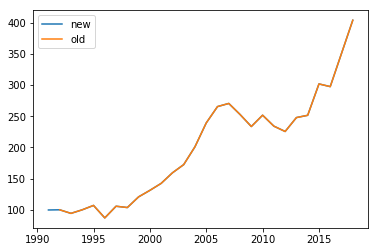

19141490300


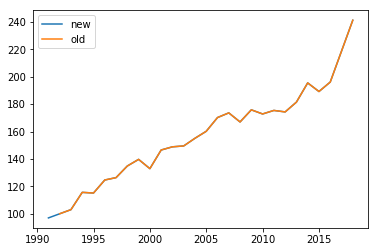

06037186403


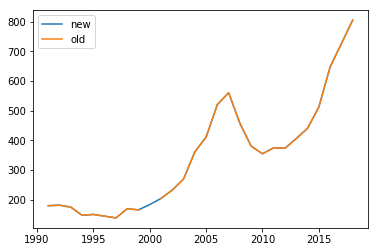

37147001500


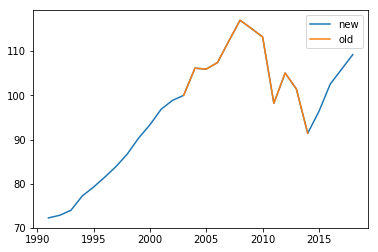

06059042320


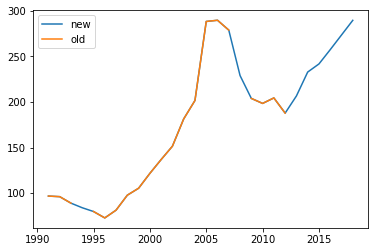

06059032011


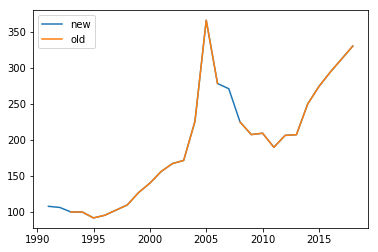

06065043252


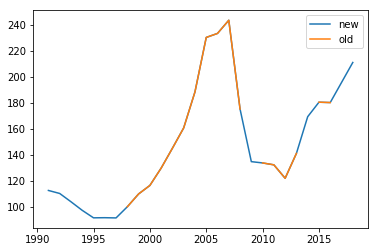

36081059800


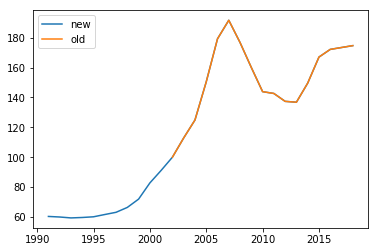

36059302101


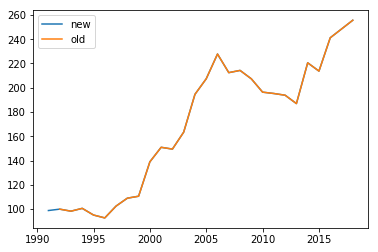

06073013310


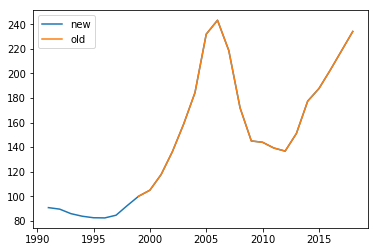

06015000201


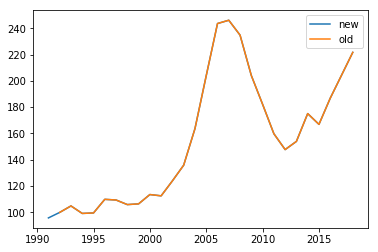

39155921200


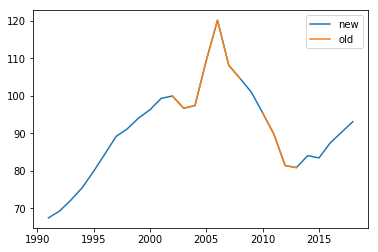

19179960800


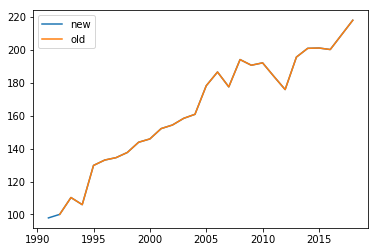

37183053410


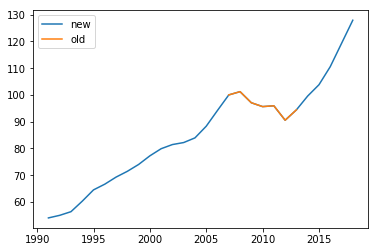

37025040702


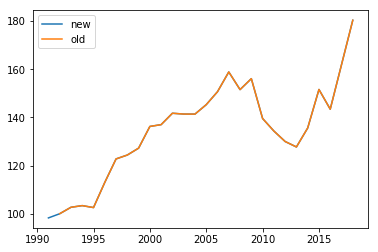

19017004400


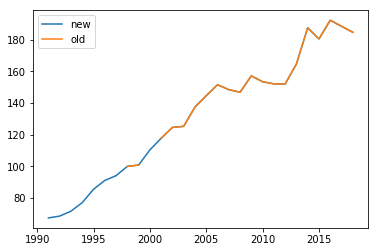

37119005906


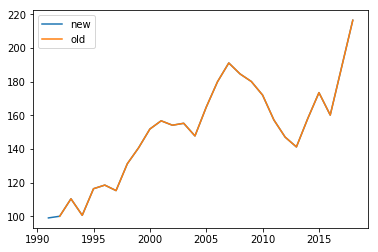

37121950200


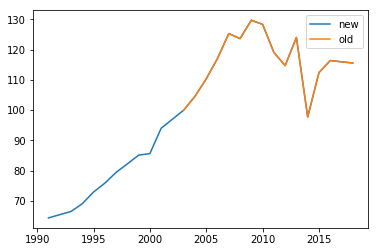

06047001004


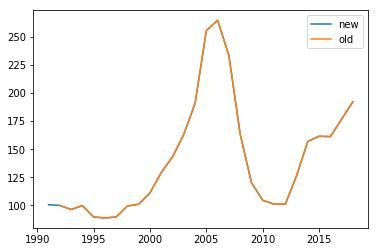

39151713700


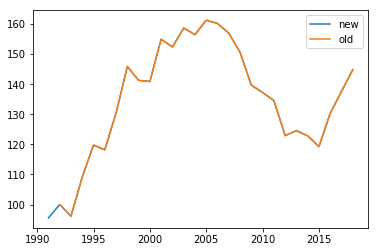

In [38]:
for i in np.random.choice((new_pv_tract_hpi)[pv_tract_hpi.isnull().sum(1)>0].index,size=20,replace=False):
    print i
    plt.plot(new_pv_tract_hpi.loc[i])
    plt.plot(pv_tract_hpi.loc[i])    
    plt.legend(['new','old'])
    plt.show()

06013359104


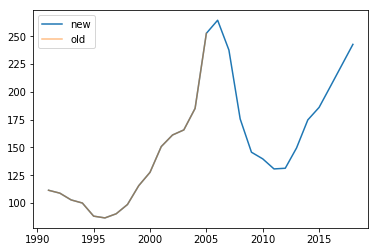

06037577604


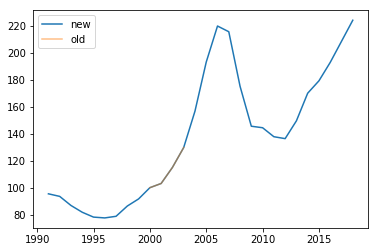

In [39]:
for i in ['06013359104','06037577604']:
    print i
    plt.plot(new_pv_tract_hpi.loc[i])
    plt.plot(pv_tract_hpi.loc[i],alpha=0.5)    
    plt.legend(['new','old'])
    plt.show()

In [40]:
pv_tract_hpi=new_pv_tract_hpi

In [41]:
pv_tract_hpi.to_csv("../input/third2/HPI_AT_BDL_tract_5state.csv")

In [42]:
pv_tract_hpi.isnull().sum().sum()

0